# OpenCV Beginner Tutorials Notebook

This is a collection of Python code examples for the requested OpenCV topics. You can copy these into a Jupyter Notebook (.ipynb) file for interactive execution. Each section includes a brief explanation, followed by the code in a markdown code block.

Make sure you have OpenCV installed in your Python environment. If not, install it via `pip install opencv-python`. These examples use `cv2` (the OpenCV module) and assume a basic setup with a webcam for video capture.


In [4]:
import cv2
import numpy as np
from datetime import datetime
import matplotlib as plt


## 1. How to Read, Write, Show Videos from Camera in OpenCV

This example demonstrates capturing video from your camera (webcam), displaying it in a window, and writing (saving) it to a file. Press 'q' to quit.


In [3]:
# Open the default camera (index 0)
cap = cv2.VideoCapture(0)

# Check if camera opened successfully
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

# Define the codec and create VideoWriter object to save the video
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Codec for .avi file
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640, 480))  # Output file, fps, frame size

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if not ret:
        print("Error: Failed to capture frame.")
        break
    
    # Write the frame to the output file
    out.write(frame)
    
    # Display the resulting frame
    cv2.imshow('Camera Feed', frame)
    
    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything when done
cap.release()
out.release()
cv2.destroyAllWindows()


## 2. Draw Geometric Shapes on Images using Python OpenCV

This example loads a blank image and draws various shapes like lines, rectangles, circles, and text using OpenCV drawing functions.


In [4]:
# Create a blank black image (height, width, channels)
image = np.zeros((512, 512, 3), np.uint8)

# Draw a line (start point, end point, color (BGR), thickness)
cv2.line(image, (0, 0), (511, 511), (255, 0, 0), 5)  # Blue line

# Draw a rectangle (top-left, bottom-right, color, thickness)
cv2.rectangle(image, (384, 0), (510, 128), (0, 255, 0), 3)  # Green rectangle

# Draw a circle (center, radius, color, thickness; -1 for filled)
cv2.circle(image, (447, 63), 63, (0, 0, 255), -1)  # Red filled circle

# Draw an ellipse (center, axes lengths, angle, start/end angles, color, thickness)
cv2.ellipse(image, (256, 256), (100, 50), 0, 0, 180, (255, 255, 0), -1)  # Cyan half-ellipse

# Draw a polygon (array of points, isClosed, color, thickness)
pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv2.polylines(image, [pts], True, (0, 255, 255), 3)  # Yellow polygon

# Add text (text, position, font, scale, color, thickness)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(image, 'OpenCV Shapes', (10, 500), font, 1, (255, 255, 255), 2, cv2.LINE_AA)

# Display the image
cv2.imshow('Shapes', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


## 3. Setting Camera Parameters in OpenCV Python

This example shows how to set properties like frame width, height, brightness, and FPS on a camera capture object.


In [ ]:
# Open the default camera
cap = cv2.VideoCapture(0)

# Check if camera opened successfully
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

# Set camera parameters
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)   # Width
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)   # Height
cap.set(cv2.CAP_PROP_FPS, 30)             # Frames per second
cap.set(cv2.CAP_PROP_BRIGHTNESS, 150)     # Brightness (0-255)
cap.set(cv2.CAP_PROP_CONTRAST, 50)        # Contrast (0-255)

# Print current parameters to verify
print("Width:", cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print("Height:", cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print("FPS:", cap.get(cv2.CAP_PROP_FPS))
print("Brightness:", cap.get(cv2.CAP_PROP_BRIGHTNESS))
print("Contrast:", cap.get(cv2.CAP_PROP_CONTRAST))

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    cv2.imshow('Adjusted Camera Feed', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Width: 1280.0
Height: 720.0
FPS: 30.0
Brightness: 0.0
Contrast: 50.0



## 4. Show Date and Time on Videos using OpenCV Python

This example captures video from the camera and overlays the current date and time on each frame using `cv2.putText` and the `datetime` module.


In [ ]:
# Open the default camera
cap = cv2.VideoCapture(0)

# Check if camera opened successfully
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Get current date and time
    current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    
    # Put text on the frame (text, position, font, scale, color, thickness)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, current_time, (10, 50), font, 1, (0, 255, 255), 2, cv2.LINE_AA)
    
    # Display the frame
    cv2.imshow('Video with Date/Time', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## 5. Handle Mouse Events in OpenCV

This example sets up a mouse callback to handle events like left-click (draw a circle) and right-click (draw a rectangle) on an image window.


In [ ]:
# Mouse callback function
def mouse_callback(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        # Draw a blue circle on left-click
        cv2.circle(img, (x, y), 10, (255, 0, 0), -1)
    elif event == cv2.EVENT_RBUTTONDOWN:
        # Draw a green rectangle on right-click
        cv2.rectangle(img, (x-10, y-10), (x+10, y+10), (0, 255, 0), 2)
    
    # Refresh the display
    cv2.imshow('Image', img)

# Create a blank image
img = np.zeros((512, 512, 3), np.uint8)

# Create a window and bind the mouse callback
cv2.namedWindow('Image')
cv2.setMouseCallback('Image', mouse_callback)

# Display the image
cv2.imshow('Image', img)

# Wait for 'q' to quit
while True:
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

## 6. Display Mouse Coordinates

This example displays the current mouse position (x, y coordinates) in the window title as you move the mouse over the image.



In [6]:

# Mouse callback function
def show_coordinates(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE:
        # Update the window title with coordinates
        cv2.setWindowTitle('Image', f'Coordinates: ({x}, {y})')
        # Display coordinates on the image
        img_copy = img.copy()  # Create a copy to avoid overwriting
        cv2.putText(img_copy, f'({x}, {y})', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        cv2.imshow('Image', img_copy)

# Create a blank image (smaller size: 320x240)
img = np.zeros((240, 320, 3), np.uint8)

# Create a window and bind the mouse callback
cv2.namedWindow('Image')
cv2.setMouseCallback('Image', show_coordinates)

# Display the image
cv2.imshow('Image', img)

# Main loop
while True:
    key = cv2.waitKey(10) & 0xFF  # Increased delay to 10ms
    if key == ord('q'):
        print("Q key pressed. Exiting...")
        break

cv2.destroyAllWindows()

Q key pressed. Exiting...


## 7. Draw Lines with Mouse Drag

This example allows you to draw lines by clicking and dragging the mouse (left button down to start, move to draw, release to finish).


In [3]:

# Global variables
drawing = False  # True if mouse is pressed
ix, iy = -1, -1  # Starting coordinates

# Mouse callback function
def draw_line(event, x, y, flags, param):
    global ix, iy, drawing

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y  # Record starting point

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            # Draw line from previous point to current
            cv2.line(img, (ix, iy), (x, y), (0, 255, 0), 2)
            ix, iy = x, y  # Update starting point for next segment

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        # Complete the line
        cv2.line(img, (ix, iy), (x, y), (0, 255, 0), 2)

# Create a blank image
img = np.zeros((512, 512, 3), np.uint8)

# Create a window and bind the mouse callback
cv2.namedWindow('Image')
cv2.setMouseCallback('Image', draw_line)

while True:
    cv2.imshow('Image', img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()



## 8. Crop Image Region with Mouse Selection

This example lets you select a rectangular region by dragging the mouse, then crops and displays the selected area in a new window.


In [7]:

# Global variables
cropping = False
x_start, y_start, x_end, y_end = -1, -1, -1, -1
image_copy = None

# Mouse callback function
def crop_image(event, x, y, flags, param):
    global x_start, y_start, x_end, y_end, cropping, image_copy

    if event == cv2.EVENT_LBUTTONDOWN:
        x_start, y_start = x, y
        cropping = True

    elif event == cv2.EVENT_MOUSEMOVE:
        if cropping:
            image_copy = img.copy()
            cv2.rectangle(image_copy, (x_start, y_start), (x, y), (0, 255, 0), 2)
            cv2.imshow('Image', image_copy)

    elif event == cv2.EVENT_LBUTTONUP:
        x_end, y_end = x, y
        cropping = False
        # Draw final rectangle
        cv2.rectangle(img, (x_start, y_start), (x_end, y_end), (0, 255, 0), 2)
        cv2.imshow('Image', img)

        # Crop the region if valid
        if x_start != x_end and y_start != y_end:
            cropped = img[min(y_start, y_end):max(y_start, y_end), min(x_start, x_end):max(x_start, x_end)]
            cv2.imshow('Cropped Region', cropped)

# Load an image and resize to smaller size (320x240)
img = cv2.imread('Sky.jpg')
if img is None:
    print("Error: Could not load image.")
    exit()
img = cv2.resize(img, (320, 240))

# Create a window and bind the mouse callback
cv2.namedWindow('Image')
cv2.setMouseCallback('Image', crop_image)

# Main loop
while True:
    cv2.imshow('Image', img)
    key = cv2.waitKey(10) & 0xFF  # Increased delay to 10ms
    if key == ord('q'):
        print("Q key pressed. Exiting...")
        break

cv2.destroyAllWindows()

Q key pressed. Exiting...


## 9. Color Picker on Image

This example allows you to click on an image to get the BGR color value at that point and display it.


In [8]:

# Mouse callback function
def pick_color(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        # Get BGR values
        b, g, r = img[y, x]
        print(f"Color at ({x}, {y}): B={b}, G={g}, R={r}")
        
        # Display a small rectangle with the picked color
        color_img = np.zeros((100, 100, 3), np.uint8)
        color_img[:] = [b, g, r]
        cv2.imshow('Picked Color', color_img)

# Load an image and resize to smaller size (320x240)
img = cv2.imread('Sky.jpg')
if img is None:
    print("Error: Could not load image.")
    exit()
img = cv2.resize(img, (320, 240))

# Create a window and bind the mouse callback
cv2.namedWindow('Image')
cv2.setMouseCallback('Image', pick_color)

# Main loop
while True:
    cv2.imshow('Image', img)
    key = cv2.waitKey(10) & 0xFF  # Increased delay to 10ms
    if key == ord('q'):
        print("Q key pressed. Exiting...")
        break

cv2.destroyAllWindows()

Color at (86, 68): B=40, G=21, R=0
Color at (195, 91): B=71, G=57, R=29
Color at (198, 116): B=102, G=80, R=52
Color at (98, 178): B=71, G=44, R=8
Color at (254, 228): B=1, G=2, R=0
Color at (197, 115): B=119, G=94, R=62
Q key pressed. Exiting...


## 10. Interactive Free Drawing with Modes

This advanced example creates a simple drawing app where you can switch modes: free drawing (drag to draw), erase (right-click drag), and clear canvas (double-click).


In [5]:

# Global variables
drawing = False
erasing = False
mode = 'draw'  # 'draw' or 'erase'

# Mouse callback function
def interactive_draw(event, x, y, flags, param):
    global drawing, erasing

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        cv2.circle(img, (x, y), 5, (0, 0, 255), -1)  # Start drawing in green

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.circle(img, (x, y), 5, (0, 0, 255), -1)
        elif erasing:
            cv2.circle(img, (x, y), 10, (0, 0, 0), -1)  # Erase with black

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

    elif event == cv2.EVENT_RBUTTONDOWN:
        erasing = True
        cv2.circle(img, (x, y), 10, (0, 0, 0), -1)

    elif event == cv2.EVENT_RBUTTONUP:
        erasing = False

    elif event == cv2.EVENT_LBUTTONDBLCLK:
        # Clear the canvas
        img[:] = 0

# Create a blank image
img = np.zeros((512, 512, 3), np.uint8)

# Create a window and bind the mouse callback
cv2.namedWindow('Drawing App')
cv2.setMouseCallback('Drawing App', interactive_draw)

while True:
    cv2.imshow('Drawing App', img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()


## 11. Bitwise Operations
This cell demonstrates bitwise operations (AND, OR, XOR, NOT) using OpenCV. It creates a black image with a white rectangle and applies bitwise operations on loaded images.

- **Bitwise Operations**: These operations (AND, OR, XOR, NOT) manipulate pixel values at the binary level. AND keeps common non-zero pixels, OR combines non-zero pixels, XOR highlights differences, and NOT inverts pixel values (e.g., 255 becomes 0, and vice versa).
- **np.zeros**: Creates a black image (all pixels 0) with specified dimensions and channels.
- **cv2.rectangle**: Draws a filled white rectangle (-1 thickness) on the black image for bitwise operations.
- **cv2.imread**: Loads images from files; requires valid file paths.
- **cv2.imshow and waitKey**: Displays images in windows; `waitKey(0)` pauses until a key is pressed.



In [ ]:
img1 = np.zeros((250, 500, 3), np.uint8) # Black imgage
img1 = cv2.rectangle(img1, (200, 0), (300, 100), (255, 255, 255),-1) # Dimension, Dimension, RGB for white color, thikness: -1: mean it will be filled with white color
img2 = cv2.imread("image_1.png")

img3 = cv2.imread("Do_It.jpg")
img3 = cv2.resize(img3, (320, 240))

# Bitwise operations
bitAnd = cv2.bitwise_and(img2, img1)  # AND operation: keeps pixels where both images are non-zero
bitOr = cv2.bitwise_or(img2, img1)    # OR operation: keeps pixels where either image is non-zero
bitXor = cv2.bitwise_xor(img2, img1)  # XOR operation: keeps pixels where exactly one image is non-zero
bitNot1 = cv2.bitwise_not(img1)       # NOT operation: inverts pixel values of img1
bitNot2 = cv2.bitwise_not(img2)       # NOT operation: inverts pixel values of img2
bitNot3 = cv2.bitwise_not(img3)       # NOT operation: inverts pixel values of img3

# Display results
# cv2.imshow("img1", img1)
# cv2.imshow("img2", img2)
# cv2.imshow("bitAnd", bitAnd)
# cv2.imshow("bitNot1", bitNot1)
# cv2.imshow("bitNot2", bitNot2)
cv2.imshow("bitNot3", bitNot3)

cv2.waitKey(0) # Press any key to quit
cv2.destroyAllWindows()


## 12. Simple Image Thresholding (OpenCV Display)
This cell applies simple thresholding techniques to an image using OpenCV’s `threshold` function and displays the results.


- **Simple Thresholding**: Compares each pixel to a threshold (e.g., 127 or 200). `THRESH_BINARY` sets pixels below the threshold to 0 and above to 255. `BINARY_INV` reverses this. `TRUNC` caps pixels above the threshold to the threshold value. `TOZERO` sets pixels below the threshold to 0, and `TOZERO_INV` sets pixels above to 0.
- **cv2.threshold**: Applies thresholding; returns a tuple where `_` is the threshold value (unused here) and `ThX` is the thresholded image.
- **cv2.resize**: Resizes the image to 400x300 pixels for consistent display.
- **Error Handling**: Checks if the image is loaded correctly using `if img is None`.


In [ ]:

img = cv2.imread("White_&_Black_Wooden_Board.jpg")
img = cv2.resize(img, (400, 300))

# Apply simple thresholding techniques
_, Th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)        # Binary: <127 → 0, ≥127 → 255
_, Th2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)    # Inverse binary: <127 → 255, ≥127 → 0
_, Th3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)         # Truncate: ≥127 → 127, else unchanged
_, Th4 = cv2.threshold(img, 200, 255, cv2.THRESH_TOZERO)        # To zero: <200 → 0, else unchanged
_, Th5 = cv2.threshold(img, 200, 255, cv2.THRESH_TOZERO_INV)    # Inverse to zero: ≥200 → 0, else unchanged

cv2.imshow("Img", img)
cv2.imshow("Th1", Th1)
cv2.imshow("Th2", Th2)
cv2.imshow("Th3", Th3)
cv2.imshow("Th4", Th4)
cv2.imshow("Th5", Th5)


cv2.waitKey(0)
cv2.destroyAllWindows()

## 13. Simple Image Thresholding (Matplotlib Display)
This cell applies the same simple thresholding techniques but displays the results in a 2x3 grid using Matplotlib, including grayscale conversion

- **Grayscale Conversion**: `cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)` converts the image to grayscale, required for thresholding since `cv2.threshold` expects single-channel images.
- **BGR to RGB**: `cv2.cvtColor(img, cv2.COLOR_BGR2RGB)` converts the image to RGB for correct color display in Matplotlib (OpenCV uses BGR).
- **Matplotlib Subplots**: `plt.subplot(2, 3, i+1)` creates a 2x3 grid for displaying images. `cmap='gray'` ensures thresholded images are shown in grayscale, while the original uses color.
- **plt.tight_layout**: Adjusts spacing to prevent overlapping titles or images.
- **plt.xticks([]), plt.yticks([])**: Removes axis ticks for cleaner visualization.


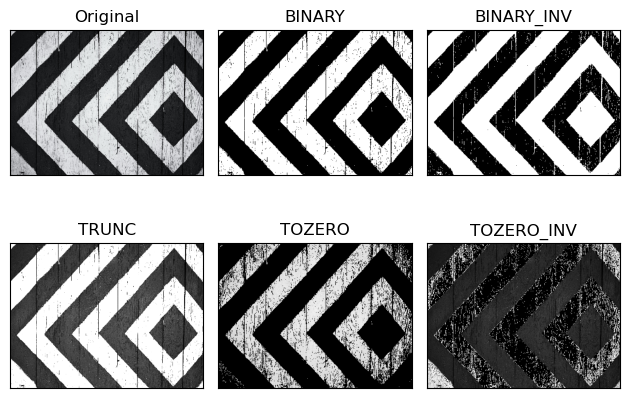

In [ ]:
# Load and resize image
img = cv2.imread("White_&_Black_Wooden_Board.jpg")
if img is None:
    raise ValueError("Image not loaded. Check the file path.")
img = cv2.resize(img, (400, 300))

# Convert to grayscale for thresholding
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# Apply different thresholding techniques
_, Th1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)        # Binary thresholding
_, Th2 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)    # Inverse binary
_, Th3 = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)         # Truncate
_, Th4 = cv2.threshold(gray, 200, 255, cv2.THRESH_TOZERO)        # To zero
_, Th5 = cv2.threshold(gray, 200, 255, cv2.THRESH_TOZERO_INV)    # Inverse to zero

# Convert original image to RGB for matplotlib (since cv2 loads in BGR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# List of titles and images
titles = ['Original', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img_rgb, Th1, Th2, Th3, Th4, Th5]


# Plot images in a 2x3 grid
for i in range(6):
    plt.subplot(2, 3, i+1)  # 2 rows, 3 columns, index i+1
    plt.imshow(images[i], cmap='gray' if i != 0 else None)  # Grayscale for thresholded images
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])  # Hide axes ticks

plt.tight_layout()  # Prevent overlap
plt.show()


## 14. Adaptive Thresholding
This cell applies adaptive thresholding techniques (mean and Gaussian) and compares them with global thresholding.

- **Adaptive Thresholding**: Unlike global thresholding, adaptive thresholding (`cv2.adaptiveThreshold`) calculates thresholds dynamically for small regions of the image. `ADAPTIVE_THRESH_MEAN_C` uses the mean of the neighborhood (11x11 block), and `ADAPTIVE_THRESH_GAUSSIAN_C` uses a weighted Gaussian mean. The constant (2) is subtracted from the computed threshold.
- **Block Size (11)**: Defines the size of the neighborhood for calculating the threshold (must be odd).
- **Constant (2)**: Adjusts the threshold value for finer control.
- **Grayscale Requirement**: Adaptive thresholding requires a single-channel (grayscale) image, hence the `cv2.cvtColor` conversion.


In [ ]:

img = cv2.imread("White_&_Black_Wooden_Board.jpg")
if img is None:
    raise ValueError("Image not loaded. Check the file path.")
img = cv2.resize(img, (400, 300))

# Convert to grayscale (this is required for proper thresholding)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Global thresholding
_, Th1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)  # Global binary thresholding

# Adaptive thresholding
Th2 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)  # Mean-based
Th3 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)  # Gaussian-based

# Display results
cv2.imshow("Original Image", img)
cv2.imshow("Global Binary", Th1)
cv2.imshow("Adaptive Mean", Th2)
cv2.imshow("Adaptive Gaussian", Th3)

cv2.waitKey(0)
cv2.destroyAllWindows()


## 15. Morphological trasformations

- **Morphological Transformations**: Operations like dilation, erosion, opening, closing, morphological gradient, and top hat manipulate binary images based on shape. They use a kernel to define the neighborhood.
- **Dilation**: Expands white regions by setting pixels to the maximum value in the kernel’s neighborhood.
- **Erosion**: Shrinks white regions by setting pixels to the minimum value in the kernel’s neighborhood.
- **Opening**: Erosion followed by dilation, useful for removing noise.
- **Closing**: Dilation followed by erosion, useful for closing small holes.
- **Morphological Gradient**: Difference between dilation and erosion, highlighting edges.
- **Top Hat**: Difference between the image and its opening, isolating small bright features.
- **Kernel**: A 3x3 matrix (`np.ones((3,3), np.uint8)`) defines the shape for morphological operations.
- **Bitwise NOT**: Inverts pixel values (0 → 255, 255 → 0) to prepare the image for thresholding.
- **Thresholding**: `THRESH_BINARY_INV` sets pixels below 220 to 255 and above to 0, creating a binary mask.
- **Matplotlib Display**: Uses a 2x4 grid (`plt.subplot(2, 4, i+1)`) with grayscale colormap (`cmap='gray'`) for visualization.


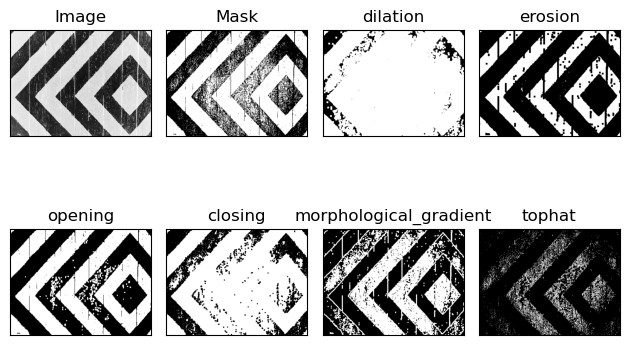

In [ ]:

# Load and resize image in grayscale
img = cv2.imread("White_&_Black_Wooden_Board.jpg", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Image not loaded. Check the file path.")
img = cv2.resize(img, (400, 300))

# Invert the image (reverse black and white)
img = cv2.bitwise_not(img)  # Method 1: Using bitwise_not to invert pixel values

# Apply thresholding to create a binary mask
_, mask = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY_INV)  # Pixels <220 → 255, ≥220 → 0

# Define kernel for morphological operations
kernel = np.ones((3, 3), np.uint8)

# Morphological transformations
dilation = cv2.dilate(mask, kernel, iterations=2)  # Expands white regions
erosion = cv2.erode(mask, kernel, iterations=2)   # Shrinks white regions
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)  # Erosion followed by dilation
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  # Dilation followed by erosion
morphological_gradient = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel)  # Difference between dilation and erosion
tophat = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernel)  # Difference between image and its opening

# List of titles and images
titles = ['Image', 'Mask', 'Dilation', 'Erosion', 'Opening', 'Closing', 'Morphological Gradient', 'Top Hat']
images = [img, mask, dilation, erosion, opening, closing, morphological_gradient, tophat]

# Plot images in a 2x4 grid
for i in range(8):
    plt.subplot(2, 4, i+1)  # 2 rows, 4 columns
    plt.imshow(images[i], cmap='gray')  # Grayscale display
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])  # Remove axis ticks

plt.tight_layout()  # Prevent overlap
plt.show()


This cell applies the same morphological transformations as Cell 1 but uses a different image (`Golf_Balls.jpg`). All techniques (bitwise NOT, thresholding, dilation, erosion, opening, closing, morphological gradient, top hat, kernel, and Matplotlib display) are identical.
- **Image Difference**: The input image is `Golf_Balls.jpg`, which may affect the visual output of morphological operations due to different content (e.g., circular objects vs. textured patterns).
- **Grayscale Loading**: `cv2.IMREAD_GRAYSCALE` loads the image directly in grayscale, eliminating the need for `cv2.cvtColor`.


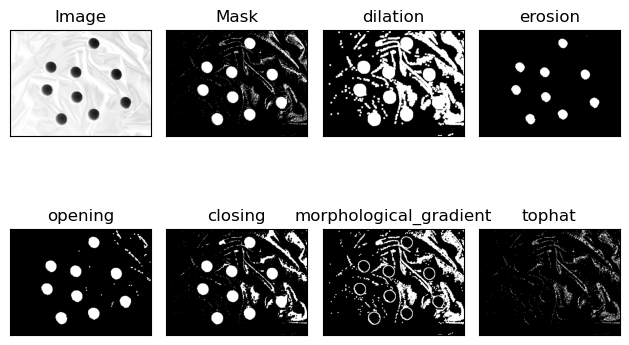

In [ ]:

# Load and resize image in grayscale
img = cv2.imread("Golf_Balls.jpg", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Image not loaded. Check the file path.")
img = cv2.resize(img, (400, 300))

# Invert the image (reverse black and white)
img = cv2.bitwise_not(img)  # Method 1: Using bitwise_not to invert pixel values

# Apply thresholding to create a binary mask
_, mask = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY_INV)  # Pixels <220 → 255, ≥220 → 0

# Define kernel for morphological operations
kernel = np.ones((3, 3), np.uint8)

# Morphological transformations
dilation = cv2.dilate(mask, kernel, iterations=2)  # Expands white regions
erosion = cv2.erode(mask, kernel, iterations=2)   # Shrinks white regions
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)  # Erosion followed by dilation
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  # Dilation followed by erosion
morphological_gradient = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel)  # Difference between dilation and erosion
tophat = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernel)  # Difference between image and its opening

# List of titles and images
titles = ['Image', 'Mask', 'Dilation', 'Erosion', 'Opening', 'Closing', 'Morphological Gradient', 'Top Hat']
images = [img, mask, dilation, erosion, opening, closing, morphological_gradient, tophat]

# Plot images in a 2x4 grid
for i in range(8):
    plt.subplot(2, 4, i+1)  # 2 rows, 4 columns
    plt.imshow(images[i], cmap='gray')  # Grayscale display
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])  # Remove axis ticks

plt.tight_layout()  # Prevent overlap
plt.show()
